In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx

In [2]:
import collections

def parcours_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append(sommet_initial)
    visites[sommet_initial] = True
    while pile:
        sommet = pile.pop()
        print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append(voisin)
                visites[voisin] = True

In [3]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
import collections

rc('animation', html='jshtml')


class Graphe:

    def __init__(self, liste_adjacence):
        self.G = liste_adjacence
        self.fig = plt.figure()
        plt.axis('off')
        self.gr = nx.Graph(self.G)
        pos = nx.spring_layout(self.gr)
        self.nodes = nx.draw_networkx_nodes(self.gr, pos, node_size=600)
        self.edges = nx.draw_networkx_edges(self.gr, pos)
        self.labels = nx.draw_networkx_labels(
            self.gr, pos, font_size=20, font_weight="bold")

    def parcours_profondeur(self, sommet_initial):
        # yield

        visites = {sommet: False for sommet in self.G.keys()}
        self.nodes.set_array([1 if visites[s] else 0 for s in self.G.keys()])
        yield
        pile = collections.deque()
        pile.append(sommet_initial)
        visites[sommet_initial] = True
        self.nodes.set_array([1 if visites[s] else 0 for s in self.G.keys()])
        yield
        while pile:
            sommet = pile.pop()
            for voisin in self.G[sommet]:
                if not visites[voisin]:
                    pile.append(voisin)
                    visites[voisin] = True
                    self.nodes.set_array(
                        [1 if visites[s] else 0 for s in self.G.keys()])
                    yield

    def animate(self, i):
        pass

    def get_parcours_profondeur_animation(self, sommet_initial):
        ani = FuncAnimation(
            self.fig, self.animate, frames=lambda: self.parcours_profondeur(sommet_initial), save_count=len(self.G)+1)
        plt.close()
        return ani


In [5]:
Graphe(G).get_parcours_profondeur_animation(1)

In [6]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 4 visité
Sommet 3 visité
Sommet 5 visité
Sommet 2 visité


In [7]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

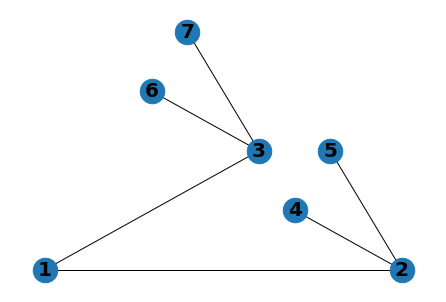

In [8]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [9]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 3 visité
Sommet 7 visité
Sommet 6 visité
Sommet 2 visité
Sommet 5 visité
Sommet 4 visité


In [10]:
import collections

def parcours_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append(sommet_initial)
    visites[sommet_initial] = True
    while file:
        sommet = file.popleft()
        print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append(voisin)
                visites[voisin] = True

In [11]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

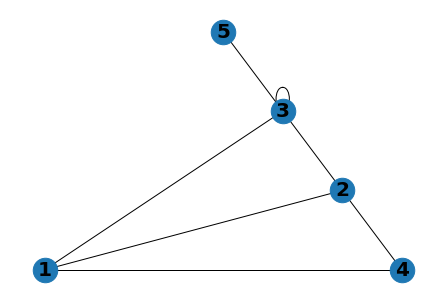

In [12]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [13]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité


In [14]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

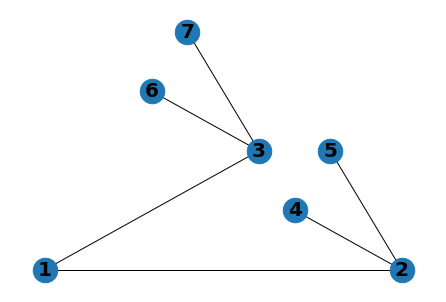

In [15]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [16]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité
Sommet 6 visité
Sommet 7 visité


In [17]:
import collections

def contient_cycle_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append((sommet_initial, None))
    visites[sommet_initial] = True
    while pile:
        sommet, parent = pile.pop()
        print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append((voisin, sommet))
                visites[voisin] = True
            elif parent != voisin:
                return True
    return False

In [18]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

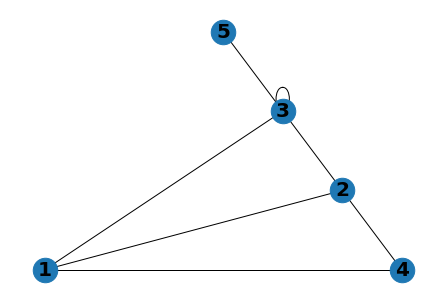

In [19]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [20]:
contient_cycle_profondeur(G, 1)

Sommet 1 visité
Sommet 4 visité


True

In [21]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

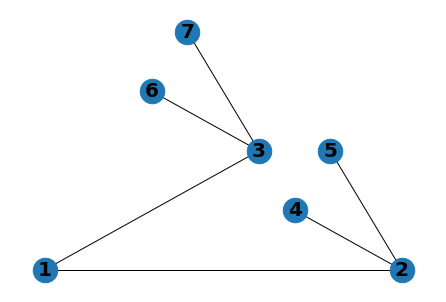

In [22]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [23]:
contient_cycle_profondeur(G, 1)

Sommet 1 visité
Sommet 3 visité
Sommet 7 visité
Sommet 6 visité
Sommet 2 visité
Sommet 5 visité
Sommet 4 visité


False

Sommet 1 visité
Sommet 2 visité


False

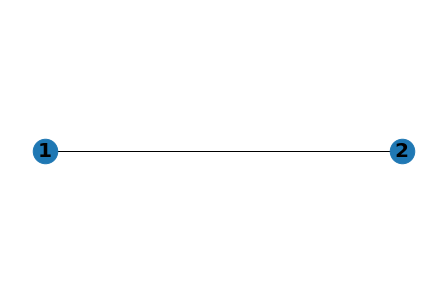

In [24]:
import collections

def contient_cycle_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append((sommet_initial, None))
    visites[sommet_initial] = True
    while file:
        sommet, parent = file.popleft()
        print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append((voisin, sommet))
                visites[voisin] = True
            elif parent != voisin:
                return True
    return False

#G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}
#G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}
G={1: [2], 2: [1]}
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)
contient_cycle_largeur(G, 1)

In [25]:
import collections

def connexite_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append(sommet_initial)
    visites[sommet_initial] = True
    while pile:
        sommet = pile.pop()
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append(voisin)
                visites[voisin] = True
    return False not in visites.values()

In [26]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

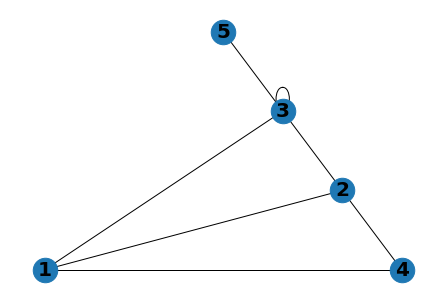

In [27]:
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [28]:
connexite_profondeur(G, 1)

True

False

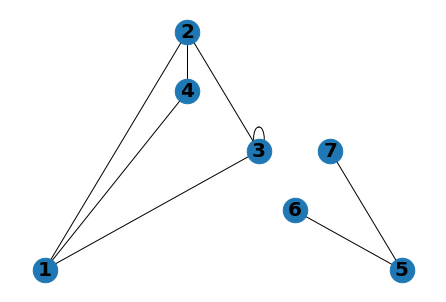

In [29]:
import scipy
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3], 4: [1, 2], 5: [6, 7], 6 :[5], 7: [5]}
nx.draw_planar(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)
connexite_profondeur(G, 1)

In [30]:
import collections

def connexite_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append(sommet_initial)
    visites[sommet_initial] = True
    while file:
        sommet = file.popleft()
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append(voisin)
                visites[voisin] = True
    return False not in visites.values()